In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
# 1. Load and preprocess data
df = pd.read_csv("Housing.csv")
df_encoded = pd.get_dummies(df, drop_first=True)

In [5]:
# SIMPLE LINEAR REGRESSION (area → price)
# -----------------------------------
X_simple = df_encoded[['area']]
y = df_encoded['price']

In [7]:
# 2. Train-test split
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y, test_size=0.2, random_state=42)

In [9]:
# 3. Fit Linear Regression model
model_simple = LinearRegression()
model_simple.fit(X_train_s, y_train_s)

LinearRegression()

In [11]:
# 4. Predict and evaluate
y_pred_s = model_simple.predict(X_test_s)
mae_s = mean_absolute_error(y_test_s, y_pred_s)
mse_s = mean_squared_error(y_test_s, y_pred_s)
r2_s = r2_score(y_test_s, y_pred_s)

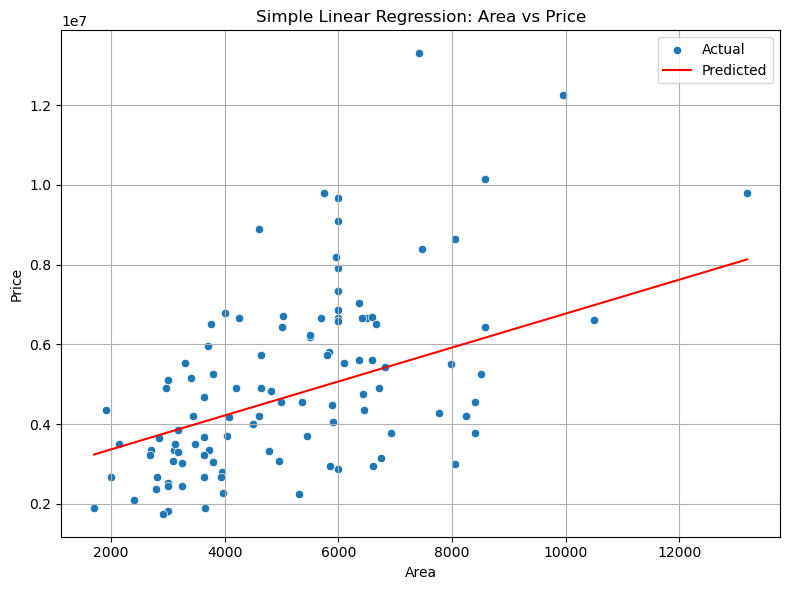

In [13]:
# 5. Plot regression line
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test_s['area'], y=y_test_s, label='Actual')
sns.lineplot(x=X_test_s['area'], y=y_pred_s, color='red', label='Predicted')
plt.title("Simple Linear Regression: Area vs Price")
plt.xlabel("Area")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [15]:
print("----- Simple Linear Regression Results -----")
print(f"MAE: {mae_s:.2f}")
print(f"MSE: {mse_s:.2f}")
print(f"R² Score: {r2_s:.2f}")

----- Simple Linear Regression Results -----
MAE: 1474748.13
MSE: 3675286604768.19
R² Score: 0.27


In [17]:
# -----------------------------------
# MULTIPLE LINEAR REGRESSION (all features)
# -----------------------------------
X_multiple = df_encoded.drop('price', axis=1)

In [19]:
# Train-test split
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multiple, y, test_size=0.2, random_state=42)


In [21]:
# Fit model
model_multiple = LinearRegression()
model_multiple.fit(X_train_m, y_train_m)

LinearRegression()

In [23]:
# Predict and evaluate
y_pred_m = model_multiple.predict(X_test_m)
mae_m = mean_absolute_error(y_test_m, y_pred_m)
mse_m = mean_squared_error(y_test_m, y_pred_m)
r2_m = r2_score(y_test_m, y_pred_m)

In [25]:
print("\n----- Multiple Linear Regression Results -----")
print(f"MAE: {mae_m:.2f}")
print(f"MSE: {mse_m:.2f}")
print(f"R² Score: {r2_m:.2f}")


----- Multiple Linear Regression Results -----
MAE: 970043.40
MSE: 1754318687330.66
R² Score: 0.65


In [27]:
# Coefficients interpretation
coefficients = pd.Series(model_multiple.coef_, index=X_multiple.columns)
print("\nFeature Coefficients (Sorted):")
print(coefficients.sort_values(ascending=False))


Feature Coefficients (Sorted):
bathrooms                          1.094445e+06
airconditioning_yes                7.914267e+05
hotwaterheating_yes                6.846499e+05
prefarea_yes                       6.298906e+05
stories                            4.074766e+05
basement_yes                       3.902512e+05
mainroad_yes                       3.679199e+05
guestroom_yes                      2.316100e+05
parking                            2.248419e+05
bedrooms                           7.677870e+04
area                               2.359688e+02
furnishingstatus_semi-furnished   -1.268818e+05
furnishingstatus_unfurnished      -4.136451e+05
dtype: float64
